### Exercise 10.2

Parallelize with MPI libraries your Simulated Annealing code in order to solve the TSP by performing a *Random Search* with **parallel SA searches of the optimal path**:
each node should perform an independent SA search and only in the end you will compare the results of each node.
Apply your code to the *usual* TSP problems above.

Il programma scrittto per risolvere l'esercizio è identico a quello utilizzato nell'esercizio 10.1. Le uniche modifiche apportate sono nel file *main.cpp*: il programma inizializza le funzioni della libreria *mpi.h* e fa eseguire lo stesso processo di creazione e ottimizzazione di un percorso per il problema del TSP a 4 core di calcolo. Quando ciascuno è giunto alla fine del processo di ottimizzazione le lunghezze dei percorsi ottenuti sono passate, attraverso la funzione *MPI_Gather*, al core 0.


Il percorso così selezionato viene quindi stampato sul file *BestTrip.dat* e riportato nel grafico qui sotto:

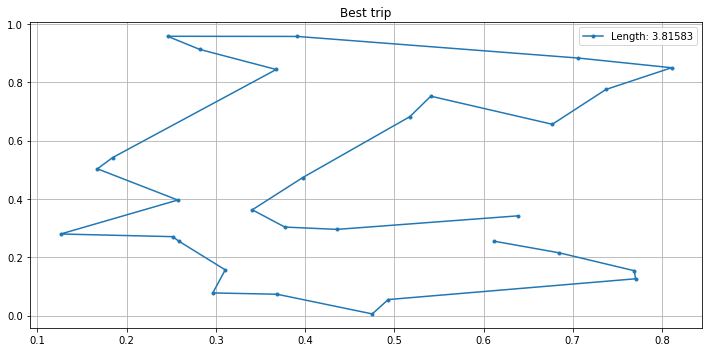

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import string
fig=plt.figure(figsize=(10, 5))

i, x, y = np.loadtxt("code/BestTrip.dat", usecols=(0,1,2), delimiter='	', unpack='true')
best_length,rank = np.loadtxt("code/BestLength.dat", usecols=(0,1), delimiter='	', unpack='true')

plt.plot(x,y,'.-',label='Length: '+str(best_length))
plt.title('Best trip')
plt.legend()
plt.grid()

plt.tight_layout()
#plt.savefig("./pictures/BestTrips.png")

plt.show()

Qui sotto invece riportiamo l'evoluzione della lnghezza del percorso e del'inverso della temperatura salvate dal processore che ha ottenuto il risultato migliore:

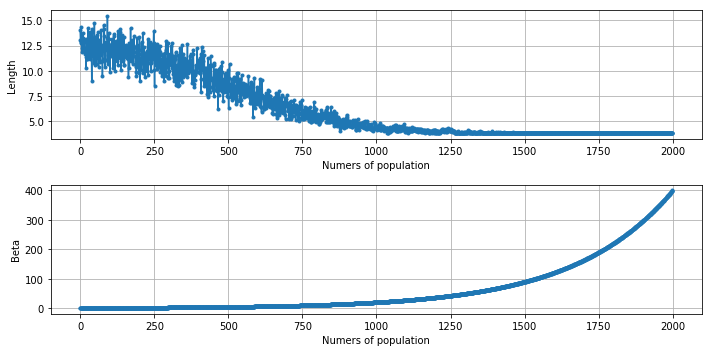

In [6]:
fig=plt.figure(figsize=(10, 5))

beta,length = np.loadtxt("code/Length"+str(int(rank))+".dat", usecols=(0,1), delimiter='	', unpack='true')

plt.subplot(2, 1, 1)
plt.plot(length, '.-')
plt.xlabel('Numers of population')
plt.ylabel('Length')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(beta, '.-')
plt.xlabel('Numers of population')
plt.ylabel('Beta')
plt.grid(True)

plt.tight_layout()
#plt.savefig("./pictures/BestTripsLength.png")

plt.show()